In [88]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [38]:
logs = []
with open('verification-logs.json', 'r') as f:
    logs = json.load(f)

In [39]:
sat_logs = []
unsat_logs = []
last_epsilons = []
false_targets = []

for log in logs:
    verification_logs = log['verification_logs']
    last_result = verification_logs[-1]['result']
    if last_result == 'sat':
        sat_logs.append(verification_logs)
        last_epsilons.append(verification_logs[-1]['epsilon'])
        false_targets.append(log['perturbed_label'])
        print("O:",log['original_label'], ' R:', log['perturbed_label'])
        print(verification_logs[-1]['epsilon'])
    else:
        unsat_logs.append(verification_logs)
    print()

O: 9  R: 5
0.13

O: 2  R: 5
0.33

O: 1  R: 2
0.23

O: 1  R: 2
0.19

O: 6  R: 3
0.09

O: 1  R: 2
0.21

O: 4  R: 5
0.15

O: 6  R: 2
0.21

O: 5  R: 6
0.13

O: 7  R: 1
0.15



In [65]:
last_epsilons

[0.13, 0.33, 0.23, 0.19, 0.09, 0.21, 0.15, 0.21, 0.13, 0.15]

Text(0, 0.5, 'Frequency')

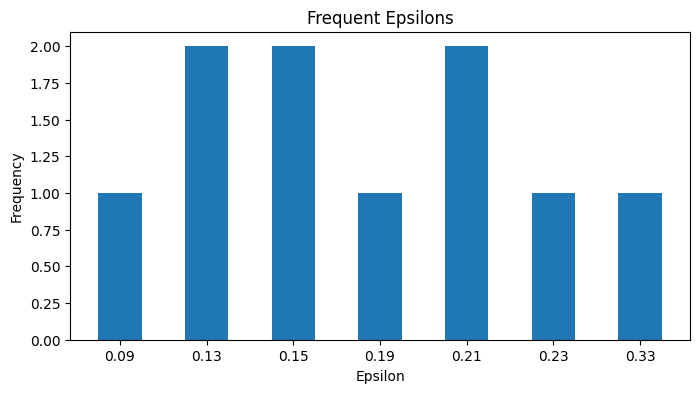

In [82]:
epsilons = []
frequency = []
epsilons_freq = {}
for e in last_epsilons:
    if e not in epsilons_freq:
        epsilons_freq[e] = 1
        continue
    epsilons_freq[e] += 1
epsilons = list(epsilons_freq.keys())
epsilons.sort()
epsilons = [str(e) for e in epsilons]
for e in epsilons:
    frequency.append(epsilons_freq[float(e)])
epsilons, frequency


plt.figure(figsize=(8, 4))
plt.bar(epsilons, frequency, width=0.5)
plt.title('Frequent Epsilons')
plt.xlabel('Epsilon')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

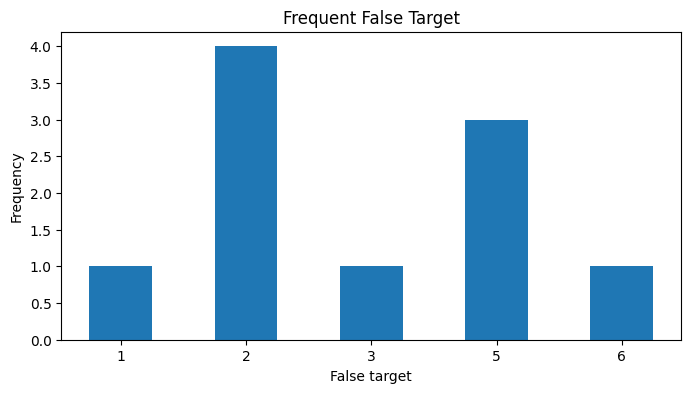

In [ ]:
false_targets
false_targets_frequency = Counter(false_targets)
targets = list(false_targets_frequency.keys())
frequency = []
targets.sort()
for t in targets:
    frequency.append(false_targets_frequency[t])
targets = [str(t) for t in targets]
targets, frequency, false_targets_frequency

plt.figure(figsize=(8, 4))
plt.bar(targets, frequency, width=0.5)
plt.title('Frequent False Target')
plt.xlabel('False Target')
plt.ylabel('Frequency')